MOUNTING THE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**LOADING THE DATA**

TRAIN IMAGES FILE = train-images-idx3-ubyte

TRAIN IMAGE LABELS= train-labels-idx1-ubyte

TEST IMAGES FILE  = test-images-idx3-ubyte

TEST IMAGE LABELS=  test-labels-idx1-ubyte

In [3]:
from mlxtend.data import loadlocal_mnist

In [4]:
X_train,y_train=loadlocal_mnist(images_path='/content/drive/My Drive/image class/train-images-idx3-ubyte',
                                labels_path='/content/drive/My Drive/image class/train-labels-idx1-ubyte')

In [5]:
X_test,y_test=loadlocal_mnist(images_path='/content/drive/My Drive/image class/t10k-images-idx3-ubyte',
                            labels_path='/content/drive/My Drive/image class/t10k-labels-idx1-ubyte')

**PRE**-**PROCESSING** **THE** **DATA**

CONVERTING PIXEL VALUES FROM INT TO FLOAT

In [6]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

UNFLATTENING THE IMAGES TO 28x28

In [7]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

NORMALISING THE DATA TO MAKE IT CONVERGE FASTER 

In [9]:
X_train = (X_train/255.0) 
X_test = (X_test/255.0)

CONVERTING LABELS TO ONE-HOT-VECTORS

In [10]:
import tensorflow as tf
import keras
import numpy as np



Using TensorFlow backend.


In [11]:
from keras.utils import to_categorical

In [12]:
y_train_oh=to_categorical(y_train,num_classes=10,dtype='float32')
y_test_oh=to_categorical(y_test,num_classes=10,dtype='float32')

DETAILS OF DATASETS

In [13]:
print(y_train.shape)
print(y_train_oh.shape)
print(y_test.shape)
print(y_test_oh.shape)

(60000,)
(60000, 10)
(10000,)
(10000, 10)


In [14]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**DEFINING** **THE MODEL**

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import adam

In [16]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
#model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

WE ARE USING DROPOUT TO CONTROL OVERFITTING. WITHOUT DROPOUT TRAIN_ACCURACY WAS 0.98 AND VAL_ACCURACY WAS 0.92 , HENCE THERE WAS A SEVERE CASE OF OVERFITTING

TRAINING THE MODEL

In [ ]:
keras.backend.clear_session

In [19]:
model.compile(optimizer=adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
hist=model.fit(x=X_train,y=y_train_oh,batch_size=32,epochs=20,validation_data=(X_test,y_test_oh))
_,acc=model.evaluate(x=X_test,y=y_test_oh)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 500us/step - loss: 0.4731 - accuracy: 0.8272 - val_loss: 0.3168 - val_accuracy: 0.8838
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.3140 - accuracy: 0.8846 - val_loss: 0.2893 - val_accuracy: 0.8954
Epoch 3/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.2767 - accuracy: 0.8982 - val_loss: 0.2425 - val_accuracy: 0.9093
Epoch 4/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.2496 - accuracy: 0.9078 - val_loss: 0.2263 - val_accuracy: 0.9172
Epoch 5/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.2362 - accuracy: 0.9131 - val_loss: 0.2211 - val_accuracy: 0.9154
Epoch 6/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.2226 - accuracy: 0.9178 - val_loss: 0.2307 - val_accuracy: 0.9171
Epoch 7/20
60000/60000 [==============================] 

**CLASSIFICATION REPORT**

In [23]:
import matplotlib.pyplot as plt


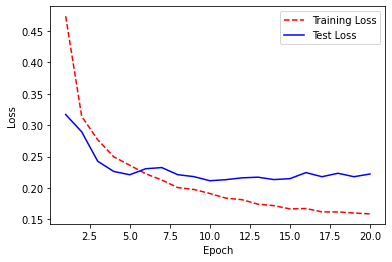

In [24]:
# Get training and test loss histories
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

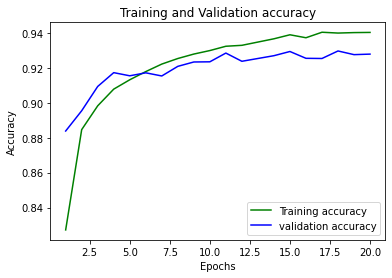

In [28]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
import sklearn.metrics as metrics
pred_oh=model.predict(X_test)
pred_labels=np.argmax(pred_oh,axis=1)
print(metrics.classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.89      0.89      1000
           3       0.92      0.95      0.94      1000
           4       0.88      0.88      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.82      0.75      0.78      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



**SAVING THE MODEL**

In [37]:
import pickle
name='Fashion_MNIST.sav'
pickle.dump(model,open(name,'wb'))